In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# chargement des donnees 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# taille de l'image
M = 32
N = 32
channel = 3
nombre_train = train_images.shape[0]
nombre_test = test_images.shape[0]
print(nombre_train)
print(nombre_test)

50000
10000


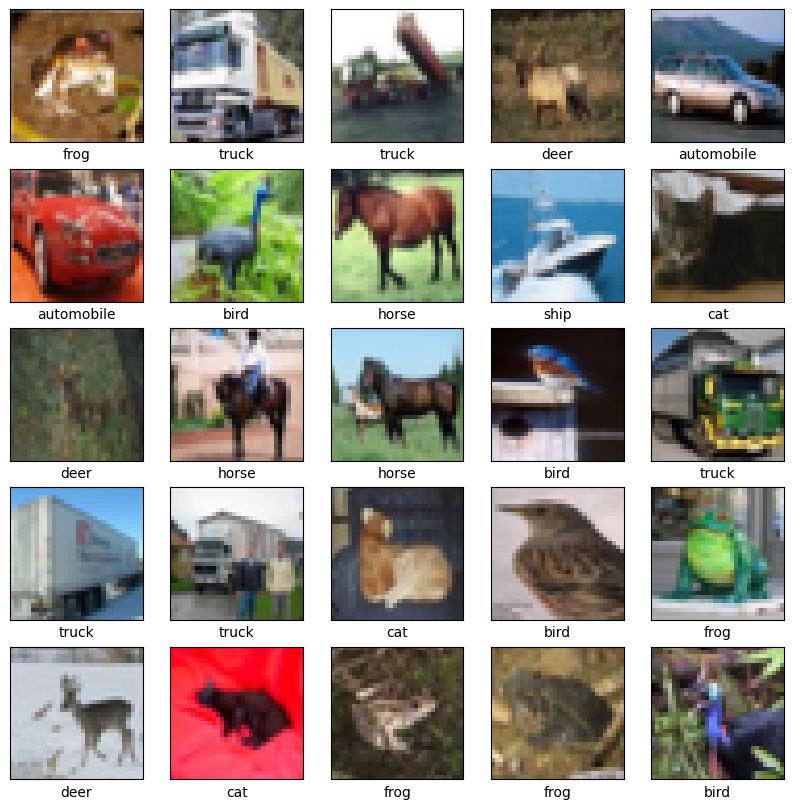

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# Normalisation
train_images, test_images = train_images / 255.0, test_images / 255.0  

# Re-dimension
trainX = train_images.reshape((nombre_train, M, N, channel))
testX = test_images.reshape((nombre_test, M, N, channel))

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(M,N,channel)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [7]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [8]:
print("[INFO] training model...")
history = model.fit(trainX, train_labels, validation_data=(testX, test_labels), batch_size=64, epochs=30)

[INFO] training model...
Epoch 1/30


C:\Users\Phuoc Le\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 40s 50ms/step - loss: 1.8858 - accuracy: 0.3103 - val_loss: 1.5206 - val_accuracy: 0.4431
Epoch 2/30
782/782 [==============================] - 39s 50ms/step - loss: 1.5408 - accuracy: 0.4452 - val_loss: 1.3331 - val_accuracy: 0.5245
Epoch 3/30
782/782 [==============================] - 39s 50ms/step - loss: 1.4054 - accuracy: 0.4980 - val_loss: 1.2356 - val_accuracy: 0.5570
Epoch 4/30
782/782 [==============================] - 40s 52ms/step - loss: 1.3056 - accuracy: 0.5351 - val_loss: 1.1785 - val_accuracy: 0.5805
Epoch 5/30
782/782 [==============================] - 37s 47ms/step - loss: 1.2227 - accuracy: 0.5656 - val_loss: 1.0945 - val_accuracy: 0.6105
Epoch 6/30
782/782 [==============================] - 33s 43ms/step - loss: 1.1560 - accuracy: 0.5911 - val_loss: 1.0737 - val_accuracy: 0.6233
Epoch 7/30
782/782 [==============================] - 35s 45ms/step - loss: 1.0945 - accuracy: 0.6143 - val_loss: 1.0928 - val_accuracy: 0.6173
Epo

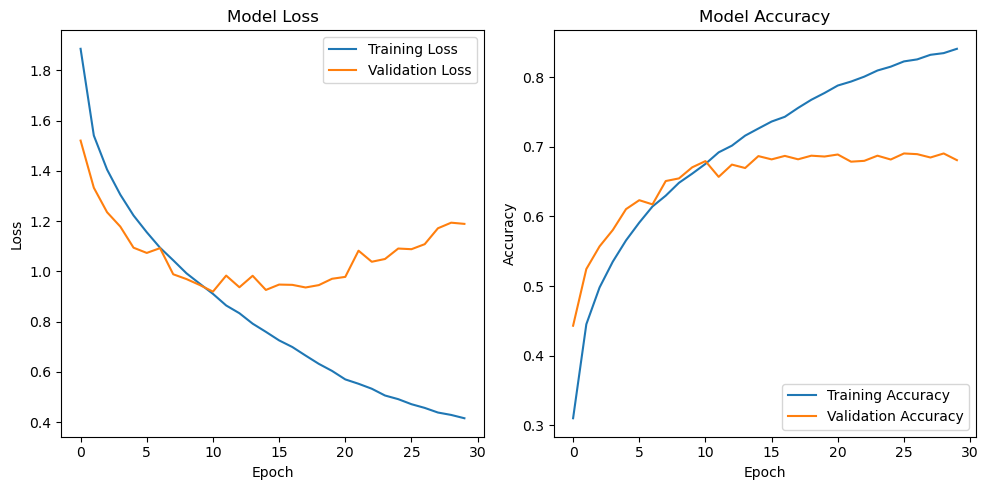

In [9]:
# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss on the first subplot
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

# Plot accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(testX, test_labels, verbose=2)

313/313 - 4s - loss: 1.1893 - accuracy: 0.6808 - 4s/epoch - 13ms/step


In [13]:
from PIL import Image
import numpy as np

def load_image (filename):
    img = Image.open(filename)
    img = img.resize((32,32))
    img.load()
    img = np.expand_dims(img, axis=0)
    data = np.asarray(img, dtype="int32")
    return data

image = load_image('pexels-pixabay-46148.jpg')
print(image)

ret = model.predict(image)
output = tf.nn.softmax(ret[0])

output = np.array(output)

predict_index = np.argmax(output)
print(f"Prediction {class_names[predict_index]} avec une probabilite {max(output)*100}%")

[[[[152 147 133]
   [ 40  57  70]
   [ 34  53  67]
   ...
   [ 33  55  77]
   [ 31  54  75]
   [ 30  54  74]]

  [[216 200 170]
   [145 141 130]
   [ 73  85  91]
   ...
   [ 35  57  80]
   [ 34  56  79]
   [ 32  56  78]]

  [[226 209 179]
   [231 213 183]
   [189 180 159]
   ...
   [ 36  59  82]
   [ 36  59  82]
   [ 35  58  81]]

  ...

  [[ 39  47  54]
   [ 42  49  57]
   [ 45  54  62]
   ...
   [105 101  96]
   [100  98  95]
   [ 85  87  87]]

  [[ 30  37  43]
   [ 32  40  46]
   [ 35  43  51]
   ...
   [ 99  96  92]
   [ 98  98  96]
   [ 84  87  88]]

  [[ 22  30  35]
   [ 26  33  39]
   [ 28  36  42]
   ...
   [ 94  94  92]
   [ 87  88  90]
   [ 76  80  82]]]]
1/1 [==============================] - 0s 16ms/step
Prediction airplane avec une probabilite 23.196931183338165%
